Here, we will perform feaure selection, model training and hyperparameter tuning

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib

In [2]:
new_df = pd.read_csv('../Data/cleaned_dataset.csv')

In [3]:
df = new_df.copy()

In [4]:
df.head()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded,depression_label_encoded
0,0,2,2,3,2,2,2,2,3,2,1,2,1,1,5
1,0,3,2,2,2,2,2,2,2,2,2,3,0,1,4
2,0,0,0,0,0,0,0,0,0,0,2,3,0,1,0
3,0,2,1,2,1,2,1,2,2,1,2,3,0,1,3
4,0,1,3,3,3,1,3,0,3,3,1,2,0,1,5


## Feature Selection

Now, let's separate independent and dependent features

In [5]:
X=df.drop('depression_label_encoded', axis=1)
y=df['depression_label_encoded']

In [6]:
X.shape

(1880, 14)

In [7]:
X.head()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded
0,0,2,2,3,2,2,2,2,3,2,1,2,1,1
1,0,3,2,2,2,2,2,2,2,2,2,3,0,1
2,0,0,0,0,0,0,0,0,0,0,2,3,0,1
3,0,2,1,2,1,2,1,2,2,1,2,3,0,1
4,0,1,3,3,3,1,3,0,3,3,1,2,0,1


In [8]:
y.shape

(1880,)

In [9]:
y.head()

0    5
1    4
2    0
3    3
4    5
Name: depression_label_encoded, dtype: int64

Now, we will divide our data (X, y) into train_test_splits

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

Now, we will perform feature selection

In [11]:
X_train.corr()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded
scholarship,1.000000,-0.000749,-0.003787,0.045922,0.026243,0.047066,0.007240,0.034951,0.014882,0.013650,0.166465,0.018829,0.030984,0.020398
little_interest,-0.000749,1.000000,0.242566,0.194187,0.196111,0.188677,0.184477,0.186935,0.181738,0.202150,0.038522,0.061611,0.042414,0.023702
feeling_down,-0.003787,0.242566,1.000000,0.534413,0.583181,0.474836,0.633991,0.529014,0.482107,0.498301,-0.040117,0.042031,0.124628,-0.007121
sleep_issues,0.045922,0.194187,0.534413,1.000000,0.538519,0.473368,0.482629,0.482010,0.414024,0.357742,-0.003235,0.029122,0.079688,-0.033885
low_energy,0.026243,0.196111,0.583181,0.538519,1.000000,0.482534,0.545173,0.482649,0.422590,0.362797,0.005705,0.056672,0.104036,-0.021473
appetite_issues,0.047066,0.188677,0.474836,0.473368,0.482534,1.000000,0.474013,0.455567,0.458227,0.410001,-0.012351,0.019278,0.070250,-0.011548
self_worth,0.007240,0.184477,0.633991,0.482629,0.545173,0.474013,1.000000,0.562067,0.473526,0.500672,-0.098308,0.029808,0.092477,-0.028813
concentration_issues,0.034951,0.186935,0.529014,0.482010,0.482649,0.455567,0.562067,1.000000,0.520228,0.411273,-0.023258,0.035122,0.087304,-0.013616
restlessness,0.014882,0.181738,0.482107,0.414024,0.422590,0.458227,0.473526,0.520228,1.000000,0.458338,-0.054290,0.041533,0.037408,-0.026926
suicidal_thoughts,0.013650,0.202150,0.498301,0.357742,0.362797,0.410001,0.500672,0.411273,0.458338,1.000000,-0.041351,0.029121,0.068550,-0.039069


Now, lets check for multicollinearity

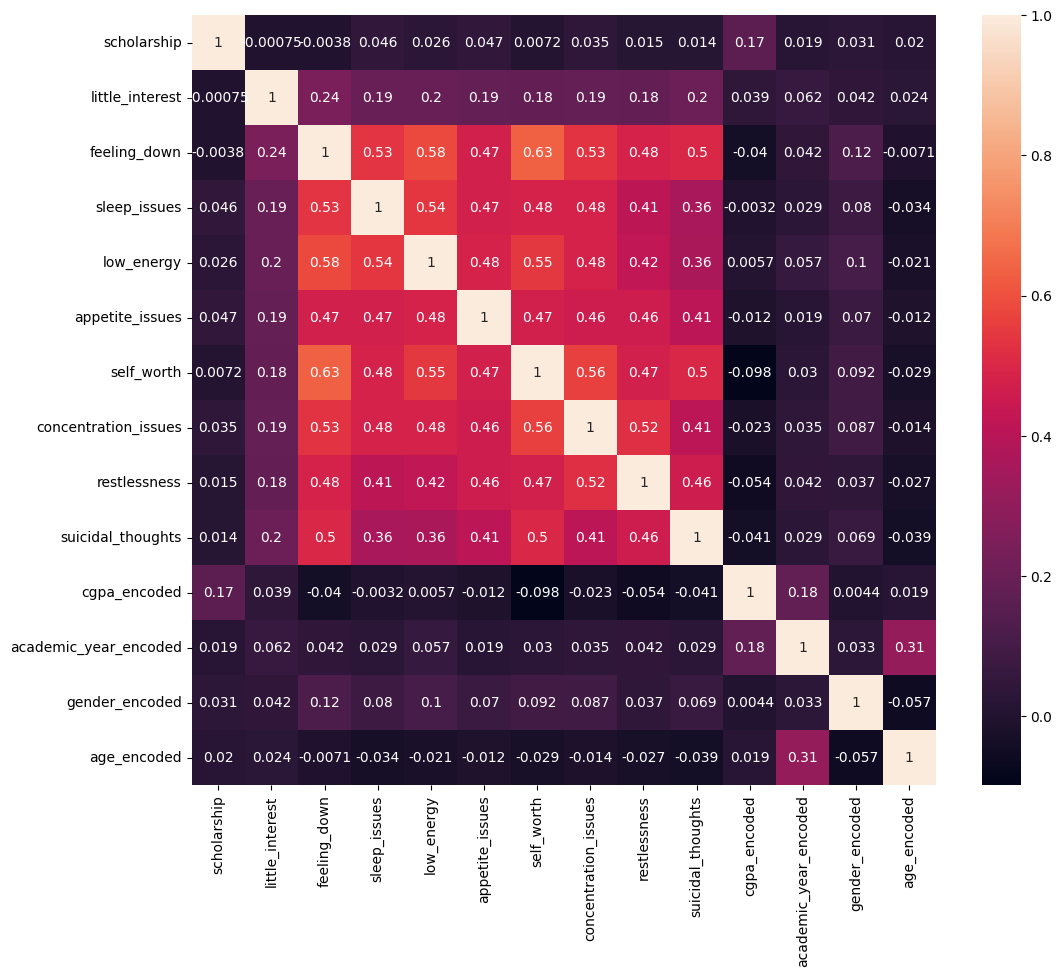

In [12]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [13]:
def drop_highly_correlated(df, threshold):
    """
    Drops features from df that are highly correlated with others.
    
    Parameters:
        df : pd.DataFrame (independent features only)
        threshold : float (correlation threshold)
    
    Returns:
        reduced_df : pd.DataFrame (features after dropping redundant ones)
        dropped_features : list of dropped column names
    """
    corr_matrix = df.corr().abs()  # absolute correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    dropped_features = [col for col in upper.columns if any(upper[col] > threshold)]
    reduced_df = df.drop(columns=dropped_features)
    
    return reduced_df, dropped_features

In [14]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [15]:
corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded
scholarship,NaN,0.000749,0.003787,0.045922,0.026243,0.047066,0.007240,0.034951,0.014882,0.013650,0.166465,0.018829,0.030984,0.020398
little_interest,NaN,NaN,0.242566,0.194187,0.196111,0.188677,0.184477,0.186935,0.181738,0.202150,0.038522,0.061611,0.042414,0.023702
feeling_down,NaN,NaN,NaN,0.534413,0.583181,0.474836,0.633991,0.529014,0.482107,0.498301,0.040117,0.042031,0.124628,0.007121
sleep_issues,NaN,NaN,NaN,NaN,0.538519,0.473368,0.482629,0.482010,0.414024,0.357742,0.003235,0.029122,0.079688,0.033885
low_energy,NaN,NaN,NaN,NaN,NaN,0.482534,0.545173,0.482649,0.422590,0.362797,0.005705,0.056672,0.104036,0.021473
appetite_issues,NaN,NaN,NaN,NaN,NaN,NaN,0.474013,0.455567,0.458227,0.410001,0.012351,0.019278,0.070250,0.011548
self_worth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562067,0.473526,0.500672,0.098308,0.029808,0.092477,0.028813
concentration_issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520228,0.411273,0.023258,0.035122,0.087304,0.013616
restlessness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458338,0.054290,0.041533,0.037408,0.026926
suicidal_thoughts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041351,0.029121,0.068550,0.039069


In [16]:
X_train_reduced, dropped = drop_highly_correlated(X_train, threshold=0.9)
print("Dropped features:", dropped)

Dropped features: []


No feature is less important, all are important for dependent feature (based on the threshold)

Now, we will perform feature scaling

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled=scaler.fit_transform(X_train)

In [19]:
X_test_scaled=scaler.transform(X_test)

Visualizing outliers using boxplots

Text(0.5, 1.0, 'X_train after scaling')

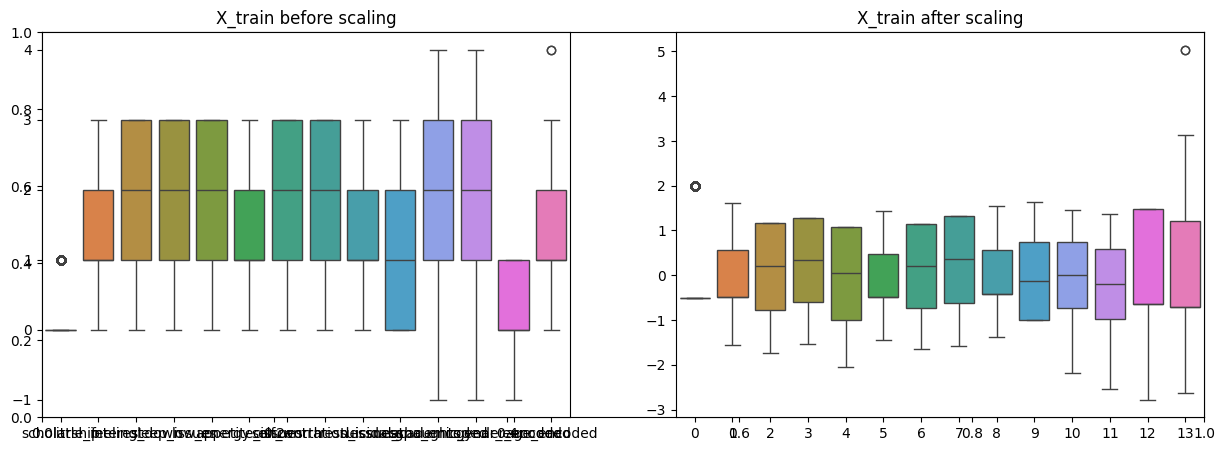

In [20]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

## Model Training

In [21]:
model = LogisticRegression(C=100, penalty='l2', solver='lbfgs', max_iter=1000)

In [22]:
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       110
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00       125

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470



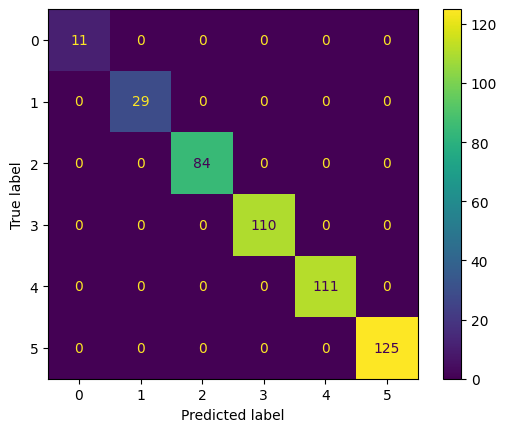

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Now, we will export the joblib

In [30]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model, 'final_model.joblib')

['final_model.joblib']